# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

%matplotlib notebook

<IPython.core.display.Javascript object>


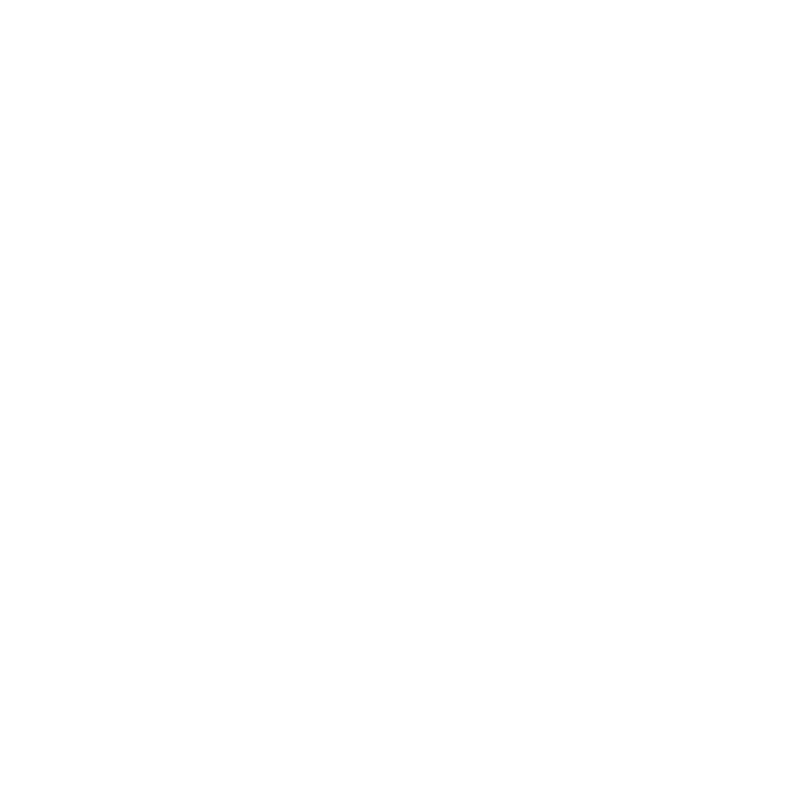

In [11]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
# Loading the dataset
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Date'] = pd.to_datetime(df['Date'],yearfirst=True) # converting date column to datetime object

# Observing random sample
print(df.sample(5))
print("="*60)
# Examining the variables
df.info()

                 ID       Date Element  Data_Value
37778   USC00200842 2012-05-17    TMIN          44
119873  USC00200230 2011-07-31    TMIN         200
158158  USC00203712 2008-07-02    TMIN         133
78831   USC00205563 2005-04-23    TMAX          39
53760   USC00203712 2007-12-17    TMIN         -78
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null datetime64[ns]
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


We shall now create a dataset that stores Max temprature across each of the 24 centers (column values) in time-series format, with Date (datetime object) column as index

In [4]:
# TMAX and TMIN stores maxium and minimum recorded tempratures across 24 centers in a time series manner, separately.
# Both the dataframe have the identical index values and column values. Just that the Data_Values are TMAX and TMIN resp.

TMAX = df[df['Element']=='TMAX'].pivot_table(index='Date', columns='ID') # TMAX
TMAX.columns = TMAX.columns.levels[1]

TMIN = df[df['Element']=='TMIN'].pivot_table(index='Date', columns='ID') # TMIN
TMIN.columns = TMIN.columns.levels[1]

Next, we shall find out the minimum and maximum tempratures in 2015 that are lower than or higher than ones recorded prior to 2015.

In [5]:
MAX = TMAX.max(axis=1) # Series of maximum temprature recorded
record_max = MAX[:'2014'].max() # Highest maximum temprature recorded prior to 2015
max_rec = MAX['2015'][MAX['2015'] > record_max] # recorded tempratures in 2015 that are higher than previous record_min

MIN = TMIN.min(axis=1) # Series of minimum temprature recorded
record_min = MIN[:'2014'].min() # lowest minimum temprature recorded prior to 2015
min_rec = MIN['2015'][MIN['2015'] < record_min] # recorded tempratures in 2015 that are lower than previous record_min

Final plotting assignment:

<IPython.core.display.Javascript object>


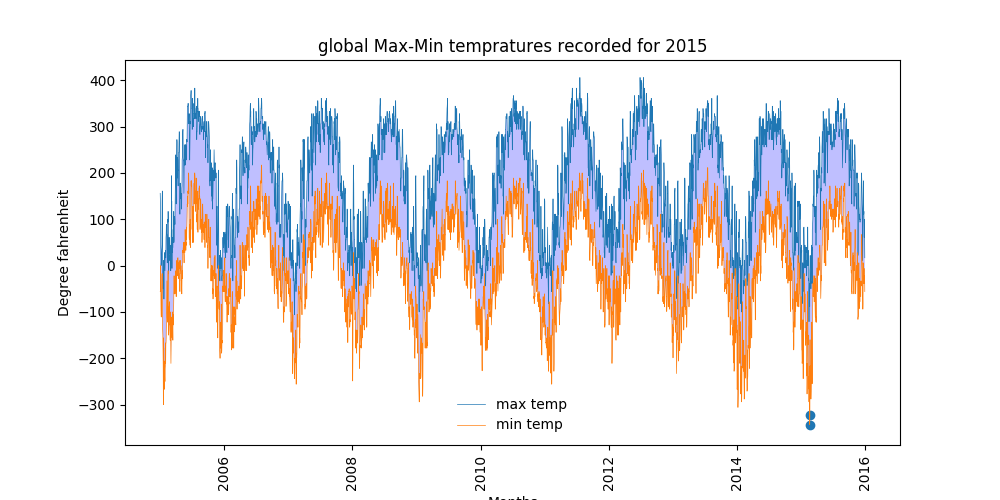

In [12]:
maxplot = TMAX.max(axis=1) # extracting maximum-recorded-temprature for 2015
minplot = TMIN.min(axis=1) # extracting maximum-recorded-temprature for 2015

# Plotting max and min recorded tempratures for 2015
plt.figure(figsize=(10,5))
plt.plot(maxplot, linewidth=0.5, label='max temp');
plt.plot(minplot, linewidth=0.5, label='min temp');
plt.scatter(x=min_rec.index, y=min_rec.values, marker='o');
plt.scatter(x=max_rec.index, y=max_rec.values, marker='+');
plt.gca().fill_between(maxplot.index, minplot, maxplot, facecolor='blue', alpha=0.25)
plt.xticks(rotation=90)
plt.legend(title=None, loc='best', frameon=False)
# plt.grid(True, axis='y')
plt.title('global Max-Min tempratures recorded for 2015')
plt.ylabel('Degree fahrenheit')
plt.xlabel('Months')
plt.show()
plt.savefig('coursera-michigan-data_visualization-ass_02-neelkanth_mehta.png')

in 2015, there has been no Max temprature that was recorded higher than that prior to 2015.